### $\color{pink}{\text{MINI PROJECT I}}$

###### $\color{white}{\text{The objective of this data analysis is 
to find the proportion of 
renovation costs with respect to average resale HDB prices from 2011-2015.}}$


In [59]:
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline

## $\color{pink}{\text{STEP 1: IMPORT CSV}}$

###### $\color{turquoise}{\text{1.1 Import the Raw Prices of Resale HDB Flats from 2000 to 2012}}$

In [60]:
# Read CSV
resale_price_2011 = pd.read_csv("resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")

# extract out the year only
resale_price_2011['year'] = resale_price_2011['month'].apply(lambda x: x[:4])
resale_price_2011.head()

#extract out the flat type and resale price
a = resale_price_2011[['flat_type','resale_price','year','town']]
a

,flat_type,resale_price,year,town
0,3 ROOM,147000.0,2000,ANG MO KIO
1,3 ROOM,144000.0,2000,ANG MO KIO
2,3 ROOM,159000.0,2000,ANG MO KIO
3,3 ROOM,167000.0,2000,ANG MO KIO
4,3 ROOM,163000.0,2000,ANG MO KIO
...,...,...,...,...
369646,5 ROOM,476888.0,2012,YISHUN
369647,5 ROOM,490000.0,2012,YISHUN
369648,5 ROOM,488000.0,2012,YISHUN
369649,EXECUTIVE,705000.0,2012,YISHUN


###### $\color{turquoise}{\text{1.2 Import the Raw Prices of Resale HDB Flats from 2012 to 2014}}$

In [61]:
# Read CSV
resale_price_2014 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
resale_price_2014.head() 

# extract out the year only
b = resale_price_2014['year'] = resale_price_2014['month'].apply(lambda x: x[:4])

#extract out the flat type and resale price
b  = resale_price_2014[['flat_type','resale_price','year','town']]
b

,flat_type,resale_price,year,town
0,2 ROOM,250000.0,2012,ANG MO KIO
1,2 ROOM,265000.0,2012,ANG MO KIO
2,3 ROOM,315000.0,2012,ANG MO KIO
3,3 ROOM,320000.0,2012,ANG MO KIO
4,3 ROOM,321000.0,2012,ANG MO KIO
...,...,...,...,...
52198,5 ROOM,580000.0,2014,YISHUN
52199,EXECUTIVE,540000.0,2014,YISHUN
52200,EXECUTIVE,738000.0,2014,YISHUN
52201,EXECUTIVE,592000.0,2014,YISHUN


###### $\color{turquoise}{\text{1.3 Import the Raw Prices of Resale HDB Flats from 2015 to 2016}}$

In [62]:
# Read CSV
resale_price_2015 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
resale_price_2015.head()

# extract out the year only
resale_price_2015['year'] = resale_price_2015['month'].apply(lambda x: x[:4])
resale_price_2015.head()

#extract out the flat type and resale price
c = resale_price_2015[['flat_type','resale_price','year','town']]
c


,flat_type,resale_price,year,town
0,3 ROOM,255000.0,2015,ANG MO KIO
1,3 ROOM,275000.0,2015,ANG MO KIO
2,3 ROOM,285000.0,2015,ANG MO KIO
3,3 ROOM,290000.0,2015,ANG MO KIO
4,3 ROOM,290000.0,2015,ANG MO KIO
...,...,...,...,...
37148,5 ROOM,488000.0,2016,YISHUN
37149,5 ROOM,455000.0,2016,YISHUN
37150,EXECUTIVE,778000.0,2016,YISHUN
37151,EXECUTIVE,575000.0,2016,YISHUN


###### $\color{turquoise}{\text{1.4 Merge all the dataframes from 2000 to 2016}}$

In [63]:
#merge the dataframes
df = pd.concat([a,b,c],axis = 0, ignore_index = True)
#df

In [64]:
# Find out the type of data in the columns in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459007 entries, 0 to 459006
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   flat_type     459007 non-null  object 
 1   resale_price  459007 non-null  float64
 2   year          459007 non-null  object 
 3   town          459007 non-null  object 
dtypes: float64(1), object(3)
memory usage: 14.0+ MB


In [65]:
# Find out the different values in the flat_type column
df['flat_type'].unique().tolist()

['3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 '2 ROOM',
 'MULTI-GENERATION',
 '1 ROOM']

###### $\color{turquoise}{\text{1.5 Drop rows with NAN values and the rows containing all flat types except for 3,4 and 5 Room HDB Flats}}$

In [66]:
# Drop rows with NaN values
df_drop_na = df.dropna()

# Drop rows with 'Executive','EXEC', '2-ROOM', '2-room' because we are not considering them
df_drop_some_rooms = df_drop_na[~df_drop_na['flat_type'].isin(['EXECUTIVE', 'MULTI-GENERATION', '2 ROOM'])]
df_drop_some_rooms



,flat_type,resale_price,year,town
0,3 ROOM,147000.0,2000,ANG MO KIO
1,3 ROOM,144000.0,2000,ANG MO KIO
2,3 ROOM,159000.0,2000,ANG MO KIO
3,3 ROOM,167000.0,2000,ANG MO KIO
4,3 ROOM,163000.0,2000,ANG MO KIO
...,...,...,...,...
458999,5 ROOM,491000.0,2016,YISHUN
459000,5 ROOM,470000.0,2016,YISHUN
459001,5 ROOM,410000.0,2016,YISHUN
459002,5 ROOM,488000.0,2016,YISHUN


###### $\color{turquoise}{\text{1.6 Import the Renovation costs}}$

In [67]:
# Read CSV
renovation_costs_csv = pd.read_csv("AVERAGE RENOVATION COSTS.csv")
# Replace NaN values with 0
renovation_costs_new_csv = renovation_costs_csv.fillna(0)
renovation_costs_new_csv

# We only want columns from 2011 to 2015
renovation_df = renovation_costs_new_csv[1:6]

#renovation_df = renovation_df.reset_index()
#renovation_df.drop('index')
renovation_df

#drop

,Year,Average renovation costs for 3 room resale HDB flat,Average renovation costs for 4 room resale HDB flat,Average renovation costs for 5 room resale HDB flat,Unnamed: 4,Unnamed: 5
1,2011.0,41877.91,46663.95,52646.51,0.0,0
2,2012.0,48997.15,54596.83,61596.42,0.0,0
3,2013.0,45498.75,50698.61,57198.43,0.0,0
4,2014.0,40598.54,45238.37,51038.16,0.0,0
5,2015.0,35000.00,39000.00,44000.00,0.0,0


In [68]:
renovation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 5 non-null      float64
 1   Average renovation costs for 3 room resale HDB flat  5 non-null      float64
 2   Average renovation costs for 4 room resale HDB flat  5 non-null      float64
 3   Average renovation costs for 5 room resale HDB flat  5 non-null      float64
 4   Unnamed: 4                                           5 non-null      float64
 5   Unnamed: 5                                           5 non-null      object 
dtypes: float64(5), object(1)
memory usage: 372.0+ bytes


## $\color{pink}{\text{STEP 2: CLEANING THE DATA}}$

### $\color{white}{\text{2.1 Sum Prices of HDB flats by Room}}$

###### $\color{turquoise}{\text{2.1.1 Sum prices of 3-room HDB flats}}$

In [69]:
# Sum the prices of  3- room hdb flats
resale_HDB_3_room_prices = df_drop_some_rooms[df_drop_some_rooms['flat_type'] == '3 ROOM'].groupby('year').agg(
    prices_sum = pd.NamedAgg(column = 'resale_price', aggfunc = sum)
    )                   
resale_HDB_3_room_prices

,prices_sum
year,
2000,1.958481e+09
2001,1.691396e+09
2002,1.547289e+09
2003,1.586136e+09
2004,1.808619e+09
2005,1.680651e+09
2006,1.457696e+09
2007,1.387037e+09
2008,1.736815e+09


##### $\color{turquoise}{\text{2.1.2 Sum prices of 4-room HDB flats}}$

In [70]:
# Sum the prices of  4- room hdb flats
resale_HDB_4_room_prices = df_drop_some_rooms[df_drop_some_rooms['flat_type'] == '4 ROOM'].groupby('year').agg(
    prices_sum = pd.NamedAgg(column = 'resale_price', aggfunc = sum)
    )                   
resale_HDB_4_room_prices

,prices_sum
year,
2000,3.365123e+09
2001,3.574229e+09
2002,3.281911e+09
2003,2.720856e+09
2004,2.766514e+09
2005,2.772801e+09
2006,2.432541e+09
2007,2.550117e+09
2008,3.099215e+09


##### $\color{turquoise}{\text{2.1.3 Sum prices of 5-room HDB flats}}$

In [71]:
# Sum the prices of  5- room hdb flats
resale_HDB_5_room_prices = df_drop_some_rooms[df_drop_some_rooms['flat_type'] == '5 ROOM'].groupby('year').agg(
    prices_sum = pd.NamedAgg(column = 'resale_price', aggfunc = sum)
    )                   
resale_HDB_5_room_prices

,prices_sum
year,
2000,2.423901e+09
2001,2.664318e+09
2002,2.495497e+09
2003,1.692392e+09
2004,1.619073e+09
2005,1.855025e+09
2006,1.813962e+09
2007,2.201839e+09
2008,2.784060e+09


### $\color{white}{\text{2.2 Sum Total Number of HDB flats by Room}}$

###### $\color{turquoise}{\text{2.2.1 Total number of 3 room HDB flats per year}}$

In [72]:
# Obtain the number of 3-room HDB flats for each year.
resale_HDB_3_room_number_of_flats = df_drop_some_rooms[df_drop_some_rooms['flat_type'] == '3 ROOM'].groupby('year')[['flat_type']].count()                                
#resale_HDB_3_room_number_of_flats = resale_HDB_3_room_number_of_flats.reset_index()
resale_HDB_3_room_number_of_flats

,flat_type
year,
2000,12423
2001,11633
2002,10731
2003,9935
2004,10366
2005,9863
2006,8743
2007,7642
2008,7670


###### $\color{turquoise}{\text{2.2.2 Total number of 4 room HDB flats per year}}$

In [73]:
# Obtain the number of 4-room HDB flats for each year.
resale_HDB_4_room_number_of_flats = df_drop_some_rooms[df_drop_some_rooms['flat_type'] == '4 ROOM'].groupby('year')[['flat_type']].count()                                
#resale_HDB_4_room_number_of_flats = resale_HDB_4_room_number_of_flats.reset_index()
resale_HDB_4_room_number_of_flats

,flat_type
year,
2000,13108
2001,15281
2002,14635
2003,11823
2004,11644
2005,11825
2006,10329
2007,10016
2008,10038


###### $\color{turquoise}{\text{2.2.3 Total number of 5 room HDB flats per year}}$

In [74]:
# Obtain the number of 5-room HDB flats for each year.
resale_HDB_5_room_number_of_flats = df_drop_some_rooms[df_drop_some_rooms['flat_type'] == '5 ROOM'].groupby('year')[['flat_type']].count()                                
#resale_HDB_5_room_number_of_flats = resale_HDB_5_room_number_of_flats.reset_index()
resale_HDB_5_room_number_of_flats

,flat_type
year,
2000,6455
2001,7832
2002,7692
2003,5255
2004,5139
2005,6113
2006,5983
2007,6722
2008,7147


### $\color{white}{\text{2.3 Concat the column with Total Number of HDB flats by Room to the data frame containing the sum of HDB resale prices by year}}$

###### $\color{turquoise}{\text{2.3.1 Concat the total number of 3 room HDB flats column to the sum of the amount of 3 room HDB flats per year column }}$

In [75]:
# Add the flat_type column to the dataframe with prices_sum to show the number of 3 room HDB flats and their resale prices per year

flat_type_column = resale_HDB_3_room_number_of_flats['flat_type']
resale_HDB_3_room_prices = pd.concat([resale_HDB_3_room_prices,flat_type_column], axis=1)
resale_HDB_3_room_prices



,prices_sum,flat_type
year,,
2000,1.958481e+09,12423
2001,1.691396e+09,11633
2002,1.547289e+09,10731
2003,1.586136e+09,9935
2004,1.808619e+09,10366
2005,1.680651e+09,9863
2006,1.457696e+09,8743
2007,1.387037e+09,7642
2008,1.736815e+09,7670


###### $\color{turquoise}{\text{2.3.2 Add the total number of 4 room HDB flats to the sum of the amount of 4 room HDB flats per year }}$

In [76]:
# Add the flat_type column to the dataframe with prices_sum to show the number of 4 room HDB flats and their resale prices per year

flat_type_column = resale_HDB_4_room_number_of_flats['flat_type']
resale_HDB_4_room_prices = pd.concat([resale_HDB_4_room_prices,flat_type_column], axis=1)
resale_HDB_4_room_prices

,prices_sum,flat_type
year,,
2000,3.365123e+09,13108
2001,3.574229e+09,15281
2002,3.281911e+09,14635
2003,2.720856e+09,11823
2004,2.766514e+09,11644
2005,2.772801e+09,11825
2006,2.432541e+09,10329
2007,2.550117e+09,10016
2008,3.099215e+09,10038


###### $\color{turquoise}{\text{2.3.3 Add the total number of 5 room HDB flats to the sum of the amount of 5 room HDB flats per year }}$

In [77]:
# Add the flat_type column to the dataframe with prices_sum to show the number of 5 room HDB flats and their resale prices per year

flat_type_column = resale_HDB_5_room_number_of_flats['flat_type']
resale_HDB_5_room_prices = pd.concat([resale_HDB_5_room_prices,flat_type_column], axis=1)
resale_HDB_5_room_prices

,prices_sum,flat_type
year,,
2000,2.423901e+09,6455
2001,2.664318e+09,7832
2002,2.495497e+09,7692
2003,1.692392e+09,5255
2004,1.619073e+09,5139
2005,1.855025e+09,6113
2006,1.813962e+09,5983
2007,2.201839e+09,6722
2008,2.784060e+09,7147


### $\color{white}{\text{2.4 Drop rows 2000 to 2010}}$

###### $\color{turquoise}{\text{2.4.1 Drop rows from 2000 to 2010 in dataframe for 3 Room HDB Flats}}$

In [78]:
# Drop rows from 2000 to 2010 as renovation data is only available from 2011 to 2015
three_room_df = resale_HDB_3_room_prices.iloc[11:16]
three_room_df

three_room_df['index'] = np.array(range(0,5))
new_df = three_room_df.set_index('index',drop=False) #2011 to 2015
new_df['Year'] = np.array([2011,2012,2013,2014,2015])
three_room_df = new_df.drop('index',axis=1)
#three_room_df.info()
three_room_df

<ipython-input-78-f214dc91a649>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_room_df['index'] = np.array(range(0,5))


,prices_sum,flat_type,Year
index,,,
0,2.073720e+09,6374,2011
1,2.260556e+09,6434,2012
2,1.741998e+09,4813,2013
3,1.718337e+09,5039,2014
4,1.618286e+09,4983,2015


###### $\color{turquoise}{\text{2.4.2 Drop rows from 2000 to 2010 in dataframe for 4 Room HDB Flats}}$

In [79]:
# Drop rows from 2000 to 2010 as renovation data is only available from 2011 to 2015
four_room_df = resale_HDB_4_room_prices.iloc[11:16]
four_room_df

four_room_df['index'] = np.array(range(0,5))
new_four_df = four_room_df.set_index('index',drop=False) #2011 to 2015
new_four_df['Year'] = np.array([2011,2012,2013,2014,2015])
four_room_df = new_df.drop('index',axis=1)
#four_room_df.info()
four_room_df

<ipython-input-79-49ec97daf6c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_room_df['index'] = np.array(range(0,5))


,prices_sum,flat_type,Year
index,,,
0,2.073720e+09,6374,2011
1,2.260556e+09,6434,2012
2,1.741998e+09,4813,2013
3,1.718337e+09,5039,2014
4,1.618286e+09,4983,2015


###### $\color{turquoise}{\text{2.4.3 Drop rows from 2000 to 2010 in dataframe for 5 Room HDB Flats}}$

In [80]:
# Drop rows from 2000 to 2010 as renovation data is only available from 2011 to 2015
five_room_df = resale_HDB_5_room_prices.iloc[11:16]
five_room_df

five_room_df['index'] = np.array(range(0,5))
new_five_df = five_room_df.set_index('index',drop=False) #2011 to 2015
new_five_df['Year'] = np.array([2011,2012,2013,2014,2015])
five_room_df = new_df.drop('index',axis=1)
#five_room_df.info()
five_room_df

<ipython-input-80-2d302e55db36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_room_df['index'] = np.array(range(0,5))


,prices_sum,flat_type,Year
index,,,
0,2.073720e+09,6374,2011
1,2.260556e+09,6434,2012
2,1.741998e+09,4813,2013
3,1.718337e+09,5039,2014
4,1.618286e+09,4983,2015


### $\color{white}{\text{2.5 Extract Average Renovation Costs column of each type of HDB Flat}}$

###### $\color{turquoise}{\text{2.5.1 Extract Average Renovation Costs column of 3 Room HDB Flats}}$

In [81]:
# Extract column with renovation costs for 3 room HDB flats from renovation dataframe
Renovation_costs_three_room = renovation_df[['Year','Average renovation costs for 3 room resale HDB flat']]
Renovation_costs_three_room['Year'] = Renovation_costs_three_room['Year'].astype(np.int64)
Renovation_costs_three_room['Year'].round(decimals = 0)
Renovation_costs_three_room = Renovation_costs_three_room.reset_index()
Renovation_costs_three_room.drop('index',axis= 1, inplace= True) # not a return a value but modify the original dataframe
Renovation_costs_three_room

<ipython-input-81-62cd8f31a512>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Renovation_costs_three_room['Year'] = Renovation_costs_three_room['Year'].astype(np.int64)


,Year,Average renovation costs for 3 room resale HDB flat
0,2011,41877.91
1,2012,48997.15
2,2013,45498.75
3,2014,40598.54
4,2015,35000.00


###### $\color{turquoise}{\text{2.5.2 Extract Average Renovation Costs column of 4 Room HDB Flats}}$

In [82]:
# Extract column with renovation costs for 4 room HDB flats from renovation dataframe
Renovation_costs_four_room = renovation_df[['Year','Average renovation costs for 4 room resale HDB flat']]
Renovation_costs_four_room['Year'] = Renovation_costs_four_room['Year'].astype(np.int64)
Renovation_costs_four_room['Year'].round(decimals = 0)
Renovation_costs_four_room = Renovation_costs_four_room.reset_index()
Renovation_costs_four_room.drop('index',axis= 1, inplace= True) # not a return a value but modify the original dataframe
Renovation_costs_four_room

<ipython-input-82-ddd2167b1882>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Renovation_costs_four_room['Year'] = Renovation_costs_four_room['Year'].astype(np.int64)


,Year,Average renovation costs for 4 room resale HDB flat
0,2011,46663.95
1,2012,54596.83
2,2013,50698.61
3,2014,45238.37
4,2015,39000.00


###### $\color{turquoise}{\text{2.5.3 Extract Average Renovation Costs column of 5 Room HDB Flats}}$

In [83]:
# Extract column with renovation costs for 5 room HDB flats from renovation dataframe
Renovation_costs_five_room = renovation_df[['Year','Average renovation costs for 5 room resale HDB flat']]
Renovation_costs_five_room['Year'] = Renovation_costs_five_room['Year'].astype(np.int64)
Renovation_costs_five_room['Year'].round(decimals = 0)
Renovation_costs_five_room = Renovation_costs_five_room.reset_index()
Renovation_costs_five_room.drop('index',axis= 1, inplace= True) # not a return a value but modify the original dataframe
Renovation_costs_five_room

<ipython-input-83-9c2a0b1d3a79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Renovation_costs_five_room['Year'] = Renovation_costs_five_room['Year'].astype(np.int64)


,Year,Average renovation costs for 5 room resale HDB flat
0,2011,52646.51
1,2012,61596.42
2,2013,57198.43
3,2014,51038.16
4,2015,44000.00


### $\color{white}{\text{2.6 Merge the column with the Average Renovation Costs with the dataframe containing the sum of resale prices and total number of resale flats}}$

###### $\color{turquoise}{\text{2.6.1 Add the Average renovation costs column to the dataframe containing total resale prices and total number of 3 Room HDB flats per year from 2011 to 2015 }}$

In [84]:
# Add the average renovation costs column to the dataframe with the number of 3 room hdb flats and resale prices
df_three_room = Renovation_costs_three_room.merge(three_room_df, how= 'left')
df_three_room

,Year,Average renovation costs for 3 room resale HDB flat,prices_sum,flat_type
0,2011,41877.91,2.073720e+09,6374
1,2012,48997.15,2.260556e+09,6434
2,2013,45498.75,1.741998e+09,4813
3,2014,40598.54,1.718337e+09,5039
4,2015,35000.00,1.618286e+09,4983


###### $\color{turquoise}{\text{2.6.2 Add the Average renovation costs column to the dataframe containing total resale prices and total number of 4 Room HDB Flats per year from 2011 to 2015 }}$

In [85]:
# Add the average renovation costs column to the dataframe with the number of 4 room hdb flats and resale prices
df_four_room = Renovation_costs_four_room.merge(four_room_df, how= 'left')
df_four_room

,Year,Average renovation costs for 4 room resale HDB flat,prices_sum,flat_type
0,2011,46663.95,2.073720e+09,6374
1,2012,54596.83,2.260556e+09,6434
2,2013,50698.61,1.741998e+09,4813
3,2014,45238.37,1.718337e+09,5039
4,2015,39000.00,1.618286e+09,4983


###### $\color{turquoise}{\text{2.6.3 Add the Average renovation costs column to the dataframe containing total resale prices and total number of 5 Room HDB Flats per year from 2011 to 2015 }}$

In [86]:
# Add the average renovation costs column to the dataframe with the number of 5 room hdb flats and resale prices
df_five_room = Renovation_costs_five_room.merge(five_room_df, how= 'left')
df_five_room

,Year,Average renovation costs for 5 room resale HDB flat,prices_sum,flat_type
0,2011,52646.51,2.073720e+09,6374
1,2012,61596.42,2.260556e+09,6434
2,2013,57198.43,1.741998e+09,4813
3,2014,51038.16,1.718337e+09,5039
4,2015,44000.00,1.618286e+09,4983


### $\color{white}{\text{2.7 Add Average Resale HDB Prices and Percentage of Average Renovation costs to the dataframe}}$

###### $\color{turquoise}{\text{2.7.1 Add 2 columns: Average Resale HDB Prices and Percentage of Average Renovation Costs to the Average Resale Price of 3 Room HDB Flats from 2011 to 2015 }}$

In [87]:
#Add a column for the average resale price of a 3 room hdb flat by year
df_three_room['Average_resale_price'] = df_three_room['prices_sum'] / df_three_room['flat_type']

# Add a column finding the proportion of renovation costs of total resale prices
df_three_room['Percentage_of_renovation_costs'] = df_three_room['Average renovation costs for 3 room resale HDB flat']/ df_three_room['Average_resale_price'] *100                                                     
df_three_room



,Year,Average renovation costs for 3 room resale HDB flat,prices_sum,flat_type,Average_resale_price,Percentage_of_renovation_costs
0,2011,41877.91,2.073720e+09,6374,325340.493078,12.872025
1,2012,48997.15,2.260556e+09,6434,351345.352017,13.945581
2,2013,45498.75,1.741998e+09,4813,361935.967677,12.570939
3,2014,40598.54,1.718337e+09,5039,341007.559966,11.905466
4,2015,35000.00,1.618286e+09,4983,324761.398531,10.777143


###### $\color{turquoise}{\text{2.7.2 Add 2 columns: Average Resale HDB Prices and Percentage of Average Renovation Costs to the Average Resale Price of 4 Room HDB Flats from 2011 to 2015 }}$

In [88]:
#Add a column for the average resale price of a 4 room hdb flat by year
df_four_room['Average_resale_price'] = df_four_room['prices_sum'] / df_four_room['flat_type']

# Add a column finding the proportion of renovation costs of total resale prices
df_four_room['Percentage_of_renovation_costs'] = df_four_room['Average renovation costs for 4 room resale HDB flat']/ df_four_room['Average_resale_price'] *100                                                     
df_four_room

,Year,Average renovation costs for 4 room resale HDB flat,prices_sum,flat_type,Average_resale_price,Percentage_of_renovation_costs
0,2011,46663.95,2.073720e+09,6374,325340.493078,14.343112
1,2012,54596.83,2.260556e+09,6434,351345.352017,15.539363
2,2013,50698.61,1.741998e+09,4813,361935.967677,14.007619
3,2014,45238.37,1.718337e+09,5039,341007.559966,13.266090
4,2015,39000.00,1.618286e+09,4983,324761.398531,12.008816


###### $\color{turquoise}{\text{2.7.3 Add 2 columns: Average Resale HDB Prices and Percentage of Average Renovation Costs to the Average Resale Price of 5 Room HDB Flats from 2011 to 2015 }}$

In [89]:
#Add a column for the average resale price of a 5 room hdb flat by year
df_five_room['Average_resale_price'] = df_five_room['prices_sum'] / df_five_room['flat_type']

# Add a column finding the proportion of renovation costs of total resale prices
df_five_room['Percentage_of_renovation_costs'] = df_five_room['Average renovation costs for 5 room resale HDB flat']/ df_four_room['Average_resale_price'] *100                                                     
df_five_room

,Year,Average renovation costs for 5 room resale HDB flat,prices_sum,flat_type,Average_resale_price,Percentage_of_renovation_costs
0,2011,52646.51,2.073720e+09,6374,325340.493078,16.181973
1,2012,61596.42,2.260556e+09,6434,351345.352017,17.531588
2,2013,57198.43,1.741998e+09,4813,361935.967677,15.803467
3,2014,51038.16,1.718337e+09,5039,341007.559966,14.966871
4,2015,44000.00,1.618286e+09,4983,324761.398531,13.548408


## $\color{pink}{\text{STEP 3: VISUALIZING THE DATA}}$

### $\color{white}{\text{3.1 Visualize the Average Renovation Costs from 2011 to 2015}}$

###### $\color{turquoise}{\text{3.1.1 Visualize the Average Renovation Costs of 3 room HDB flats from 2011 to 2015}}$

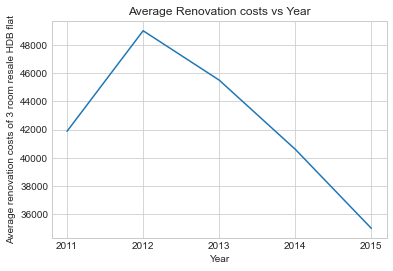

In [90]:
# Establish that there is a relationship between the average renovations costs and resale prices of HDB flats
import matplotlib.pyplot as plt
yAxis = df_three_room['Average renovation costs for 3 room resale HDB flat'] # for the y-axis
xAxis = df_three_room['Year'].astype(str) #for the x-axis, changed to string to ensure no decimals
plt.style.use('seaborn-whitegrid') # to add the grid lines


plt.title('Average Renovation costs vs Year') #title of the graph
plt.xlabel('Year') #title of the x axis
plt.ylabel('Average renovation costs of 3 room resale HDB flat') #title of the y axis

plt.plot(xAxis,yAxis) #show the graph





###### $\color{turquoise}{\text{3.1.2 Visualize the Average Renovation Costs of 4 room HDB flats from 2011 to 2015}}$

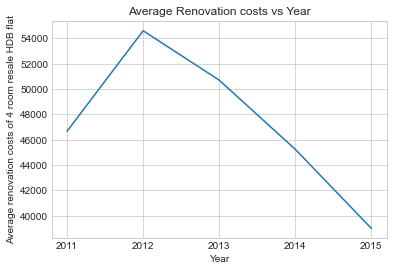

In [91]:
# Establish that there is a relationship between the average renovations costs and resale prices of HDB flats
import matplotlib.pyplot as plt
yAxis = df_four_room['Average renovation costs for 4 room resale HDB flat'] # for the y-axis
xAxis = df_four_room['Year'].astype(str) #for the x-axis, changed to string to ensure no decimals
plt.style.use('seaborn-whitegrid') # to add the grid lines


plt.title('Average Renovation costs vs Year') #title of the graph
plt.xlabel('Year') #title of the x axis
plt.ylabel('Average renovation costs of 4 room resale HDB flat') #title of the y axis

plt.plot(xAxis,yAxis) #show the graph

###### $\color{turquoise}{\text{3.1.3 Visualize the Average Renovation Costs of 5 room HDB flats from 2011 to 2015}}$

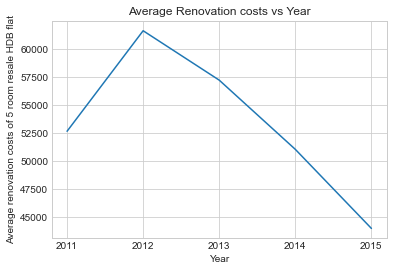

In [92]:
# Establish that there is a relationship between the average renovations costs and resale prices of HDB flats
import matplotlib.pyplot as plt
yAxis = df_five_room['Average renovation costs for 5 room resale HDB flat'] # for the y-axis
xAxis = df_five_room['Year'].astype(str) #for the x-axis, changed to string to ensure no decimals
plt.style.use('seaborn-whitegrid') # to add the grid lines


plt.title('Average Renovation costs vs Year') #title of the graph
plt.xlabel('Year') #title of the x axis
plt.ylabel('Average renovation costs of 5 room resale HDB flat') #title of the y axis

plt.plot(xAxis,yAxis) #show the graph

### $\color{white}{\text{3.2 Visualize the Average Prices from 2011 to 2015}}$

###### $\color{turquoise}{\text{3.2.1 Visualize the Average Prices of 3 room HDB flats from 2011 to 2015}}$

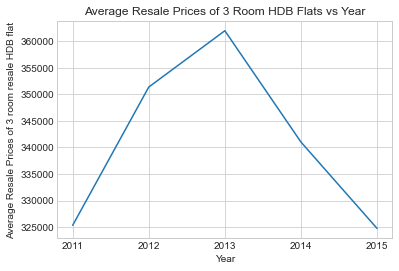

In [93]:
# Line graph to show if renovation costs have increased or decreased from 2011 to 2015 
plt.style.use('seaborn-whitegrid') # to add the grid lines
yAxis = df_three_room['Average_resale_price'] # for the y-axis
xAxis = df_three_room['Year'].astype(str) #for the x-axis, changed to string to ensure no decimals

plt.title('Average Resale Prices of 3 Room HDB Flats vs Year') #title of the graph
plt.xlabel('Year') #title of the x axis
plt.ylabel('Average Resale Prices of 3 room resale HDB flat') #title of the y axis
plt.plot(xAxis,yAxis) #show the graph


###### $\color{turquoise}{\text{3.2.2 Visualize the Average Prices of 4 room HDB flats from 2011 to 2015}}$

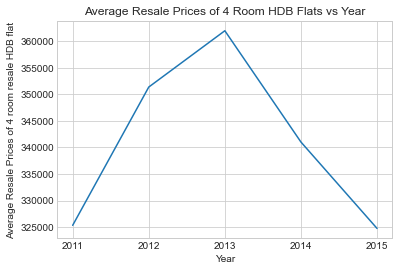

In [94]:
# Line graph to show if renovation costs have increased or decreased from 2011 to 2015 
plt.style.use('seaborn-whitegrid') # to add the grid lines
yAxis = df_four_room['Average_resale_price'] # for the y-axis
xAxis = df_four_room['Year'].astype(str) #for the x-axis, changed to string to ensure no decimals

plt.title('Average Resale Prices of 4 Room HDB Flats vs Year') #title of the graph
plt.xlabel('Year') #title of the x axis
plt.ylabel('Average Resale Prices of 4 room resale HDB flat') #title of the y axis
plt.plot(xAxis,yAxis) #show the graph

###### $\color{turquoise}{\text{3.2.3 Visualize the Average Prices of 5 room HDB flats from 2011 to 2015}}$

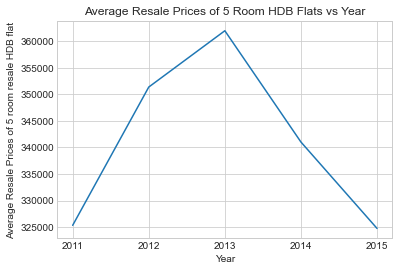

In [95]:
# Line graph to show if renovation costs have increased or decreased from 2011 to 2015 
plt.style.use('seaborn-whitegrid') # to add the grid lines
yAxis = df_five_room['Average_resale_price'] # for the y-axis
xAxis = df_five_room['Year'].astype(str) #for the x-axis, changed to string to ensure no decimals

plt.title('Average Resale Prices of 5 Room HDB Flats vs Year') #title of the graph
plt.xlabel('Year') #title of the x axis
plt.ylabel('Average Resale Prices of 5 room resale HDB flat') #title of the y axis
plt.plot(xAxis,yAxis) #show the graph

### $\color{white}{\text{3.3 Visualize the proportion of renovation costs}}$

###### $\color{turquoise}{\text{3.3.1 Visualize the proportion of the renovation costs of 3 room HDB flats and average resale HDB Prices from 2011 to 2015}}$

Text(0.5, 1.0, 'Proportion of Average Renovation Costs with respect to Average Resale Prices of 3 room HDB Flats')

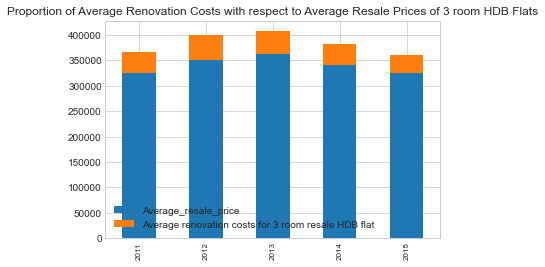

In [96]:
# Use a stacked bar chart to show the proprortion of average renovation costs against average resale prices per year

axis = df_three_room[["Average_resale_price", "Average renovation costs for 3 room resale HDB flat"]].plot(kind="bar",stacked=True)
fig=axis.get_figure()
plt.xticks(range(5), ['2011','2012','2013','2014','2015'], fontsize=8, rotation=90) #change the x axis
plt.title('Proportion of Average Renovation Costs with respect to Average Resale Prices of 3 room HDB Flats')

###### $\color{turquoise}{\text{3.3.2 Visualize the proportion of the renovation costs of 4 room HDB flats and average resale HDB Prices from 2011 to 2015}}$

Text(0.5, 1.0, 'Proportion of Average Renovation Costs with respect to Average Resale Prices of 4 room HDB Flats')

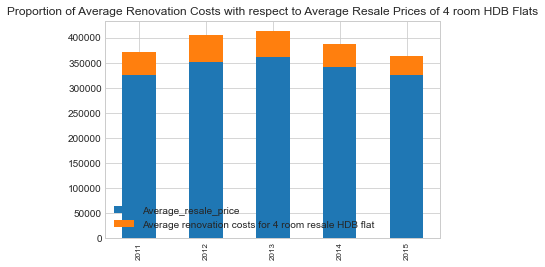

In [97]:
# Use a stacked bar chart to show the proprortion of average renovation costs against average resale prices per year

axis = df_four_room[["Average_resale_price", "Average renovation costs for 4 room resale HDB flat"]].plot(kind="bar",stacked=True)
fig=axis.get_figure()
plt.xticks(range(5), ['2011','2012','2013','2014','2015'], fontsize=8, rotation=90) #change the x axis
plt.title('Proportion of Average Renovation Costs with respect to Average Resale Prices of 4 room HDB Flats')

###### $\color{turquoise}{\text{3.3.3 Visualize the proportion of the renovation costs of 5 room HDB flats and average resale HDB Prices from 2011 to 2015}}$

Text(0.5, 1.0, 'Proportion of Average Renovation Costs with respect to Average Resale Prices of 5 room HDB Flats')

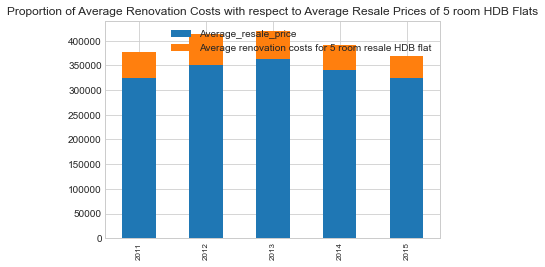

In [100]:
# Use a stacked bar chart to show the proprortion of average renovation costs against average resale prices per year

axis = df_five_room[["Average_resale_price", "Average renovation costs for 5 room resale HDB flat"]].plot(kind="bar",stacked=True)
fig=axis.get_figure()
plt.xticks(range(5), ['2011','2012','2013','2014','2015'], fontsize=8, rotation=90) #change the x axis
plt.title('Proportion of Average Renovation Costs with respect to Average Resale Prices of 5 room HDB Flats')

###### $\color{turquoise}{\text{3.3.4 Visualize the Average Percentage of Renovation Costs from 2011 to 2015 of 3,4 and 5 Room HDB Flats}}$

In [110]:
# Obtain the average percentage of the renovation costs from 3,4 and 5 Room HDB Flats from 2011 to 2015
three_room_renoation_percentage_average = df_three_room['Percentage_of_renovation_costs'].sum() / 5
three_room_renoation_percentage_average

four_room_renoation_percentage_average = df_four_room['Percentage_of_renovation_costs'].sum() / 5

five_room_renoation_percentage_average = df_five_room['Percentage_of_renovation_costs'].sum() / 5

In [108]:
# Create new list with the average percentage of renovation costs from 3-room, 4-room, 5-room HDB Flats
Renovation_percentage_average = [['3-room',three_room_renoation_percentage_average],['4-room',four_room_renoation_percentage_average],['5-room',five_room_renoation_percentage_average]]                       

df_Renovation_percentage_average = pd.DataFrame(Renovation_percentage_average, columns = ['Type of HDB','Percentage'])

#Generate new dataframe
df_Renovation_percentage_average



,Type of HDB,Percentage
0,3-room,12.414231
1,4-room,13.833000
2,5-room,15.606461


Text(0, 0.5, 'Percentage')

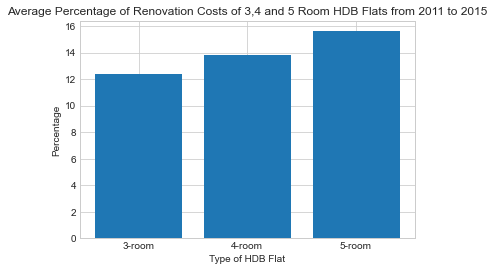

In [112]:
# Plot in a bar graph
plt.bar(df_Renovation_percentage_average['Type of HDB'],df_Renovation_percentage_average['Percentage'])
plt.title("Average Percentage of Renovation Costs of 3,4 and 5 Room HDB Flats from 2011 to 2015")
plt.xlabel('Type of HDB Flat')
plt.ylabel('Percentage')


## $\color{pink}{\text{STEP 4: FINDINGS}}$

###### $\color{white}{\text{(1) 3- Room HDB Flats: 
The proportion of renovation 
costs with respect to resale prices have been decreasing from 2011 to 2015}}$
###### $\color{white}{\text{(2) 4-Room HDB Flats:The proportion of renovation costs with respect to resale prices have been decreasing from 2011 to 2015}}$
###### $\color{white}{\text{(3) 5-Room HDB Flats:The proportion of renovation costs with respect to resale prices have been decreasing from 2011 to 2015}}$
###### $\color{white}{\text{(4) The average percentage of renovation costs of 5 Room HDB Flats from 2011 to 2015 is the highest}}$
